<a href="https://colab.research.google.com/github/CarlosRochaCx/MNA/blob/main/Actividad4EDA_A01796914.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 4**
Exploración de datos

---

*   NOMBRE: Carlos Alberto Rocha Chávez
*   MATRÍCULA: A01796914

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/MNA - Maestría en Inteligencia Artificial Aplicada/Ciencia y Analítica de Datos/Actividad 4 - EDA"
os.chdir(DIR)

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df = pd.read_csv("credit_risk_dataset.csv")
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


# **Parte 1**. Análisis descriptivo (univariante)

1. Utiliza el método `info()` del dataframe, para obtener el resumen de los tipos de datos. ¿Cuántas columnas son numéricas y cuántas cualitativas?

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


El dataframe contiene 8 columnas con datos numéricos y 4 columnas con datos cualitativos.

 2. Determina el porcentaje de valores faltantes por columna.


In [25]:
missing_values = df.isna().sum()
missing_values_percentage = missing_values / len(df) * 100
missing_values_percentage

,0
person_age,0.000000
person_income,0.000000
person_home_ownership,0.000000
person_emp_length,2.747000
loan_intent,0.000000
loan_grade,0.000000
loan_amnt,0.000000
loan_int_rate,9.563856
loan_status,0.000000
loan_percent_income,0.000000


Solamente dos columnas tienen valores faltantes. A la columna "person_emp_length" le hace falta 2.75% de sus datos y a la columna "loan_int_rate" le hace falta 9.56% de sus datos.

# Análisis de variables numéricas

3. Obtén las siguientes estadísticas descriptivas para todas las variables numéricas:
*   Tendencia central (media, mediana)
*   Dispersión o variabilidad (min, max, desviación estándar, cuartiles)
*   Forma (asimetría y curtosis)
*   Clasifica las variables `person_age` y `loan_in_rate` según los valores observados de asimetría y curtosis

**NOTA**. Recuerda que muchas de estas estadísticas, puedes obtenerlas utilizando la función `describe()` y que la mediana está representada en el 2do cuartil (50%)

In [26]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


Al utilizar la función `describe()` obtenemos las estadísticas descriptivas de tendencia central (media, mediana) y de dispersión o variabilidad (min, max, desviación estándar y cuartiles).

In [27]:
df.skew(numeric_only = True)

,0
person_age,2.581393
person_income,32.865349
person_emp_length,2.614455
loan_amnt,1.192477
loan_int_rate,0.208550
loan_status,1.364888
loan_percent_income,1.064669
cb_person_cred_hist_length,1.661790


Al calcular la estadística descriptiva de la asimetría en los datos, podemos observar lo siguiente:

* `person_age`: Al tener un valor de 2.58, mayor a 0, significa que la variable es asimétrica de forma positiva. Esto quiere decir que al graficar estos datos, la cola de la gráfica se extenderá más a la derecha.
* `loan_int_rate`: Al tener un valor de 0.20, muy cercano a 0, significa que la variable se podría considerar aproximadamente simétrica, con una muy ligera inclinación positiva hacia la derecha.

In [28]:
df.kurt(numeric_only = True)

,0
person_age,18.560825
person_income,2693.272776
person_emp_length,43.722338
loan_amnt,1.423565
loan_int_rate,-0.671609
loan_status,-0.137088
loan_percent_income,1.223687
cb_person_cred_hist_length,3.716194


Al calcular la estadística descriptiva de la curtosis en los datos, podemos observar lo siguiente:

* `person_age`: Al tener un valor de 18.56  se indica que esta variable tiene una curtosis leptocúrtica.
* `loan_int_rate`: Al tener un valor negativo de -0.67 se indica que esta variable tiene una curtosis platicúrtica.

4. Utiliza histogramas para determinar la distribución de los valores representados en cada variable.
*   ¿Se corresponde con lo obtenido en el cálculo de asimetría? Como verás, los datos reales son más complejos que la teoría. Por esta razón, recuerda siempre acompañar el análisis de la asimetría con algún gráfico como un histograma.

**NOTA**. Para esto también puedes ocupar los gráficos `kde` ([kernel density estimation](https://www.cienciadedatos.net/documentos/pystats02-kernel-density-estimation-kde-python.html)) que crean una curva continua y suave expandiendo la idea del histograma.

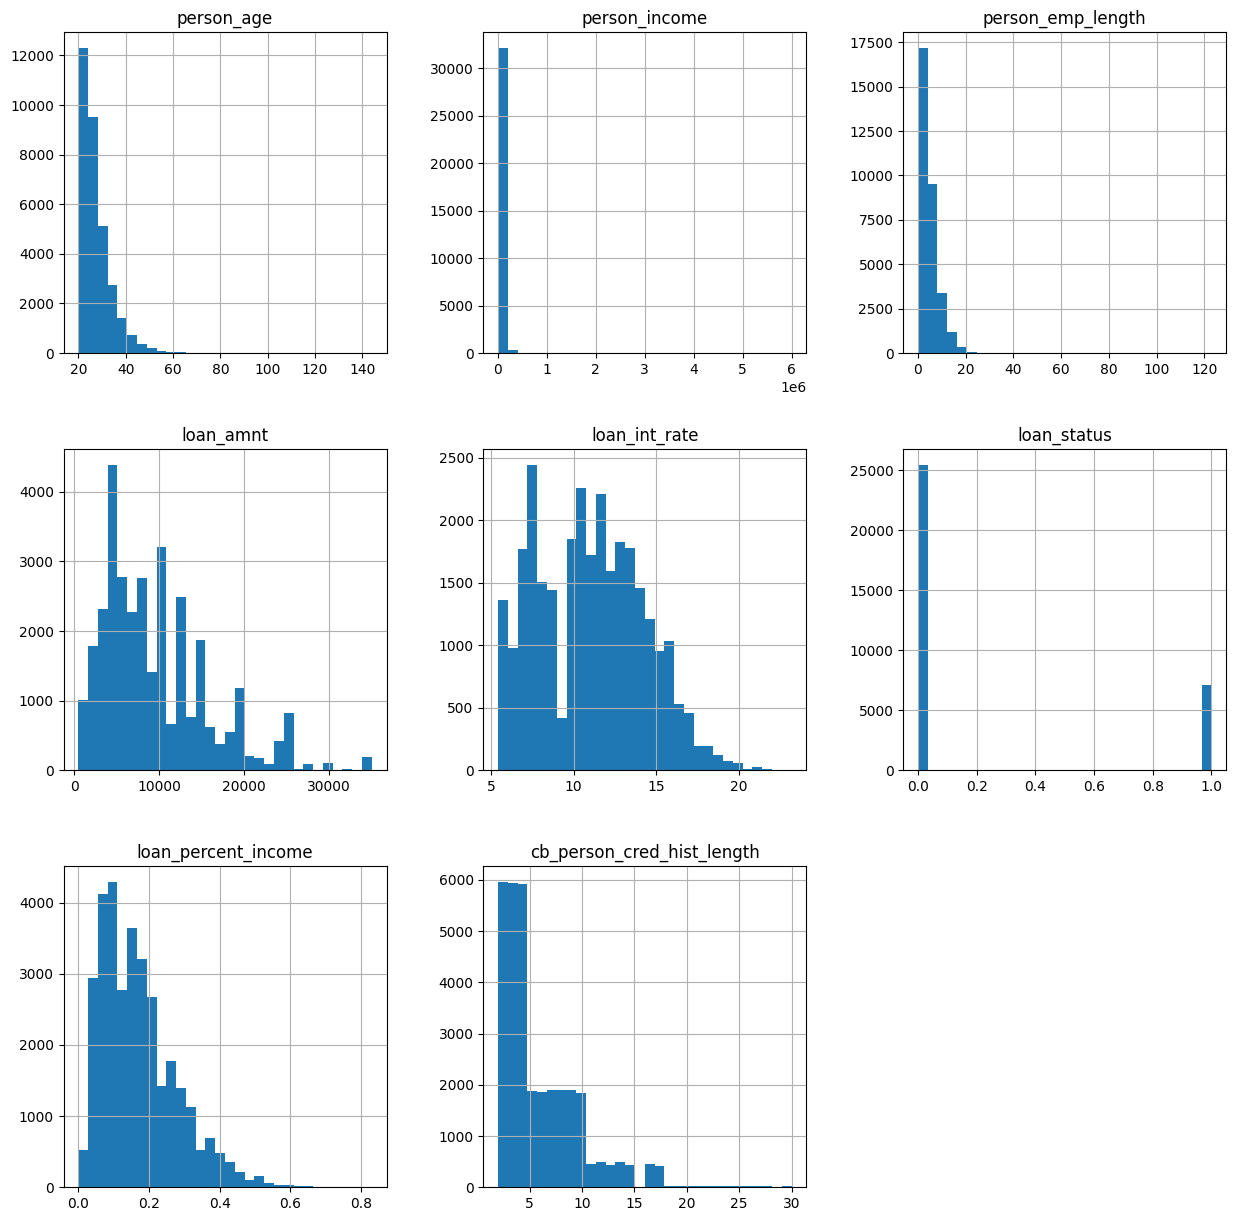

In [29]:
df.hist(figsize=(15,15), bins=30)
plt.show()

Los histogramas si corresponden con el cálculo de la simetría. Tomando como ejemplo la variables analizadas de `person_age`, se puede observar una forma asimétrica positiva, donde la cola hacia la derecha es bastante visible.

5. Emplea boxplots para mostrar la distribución de los datos a través de sus cuartiles.

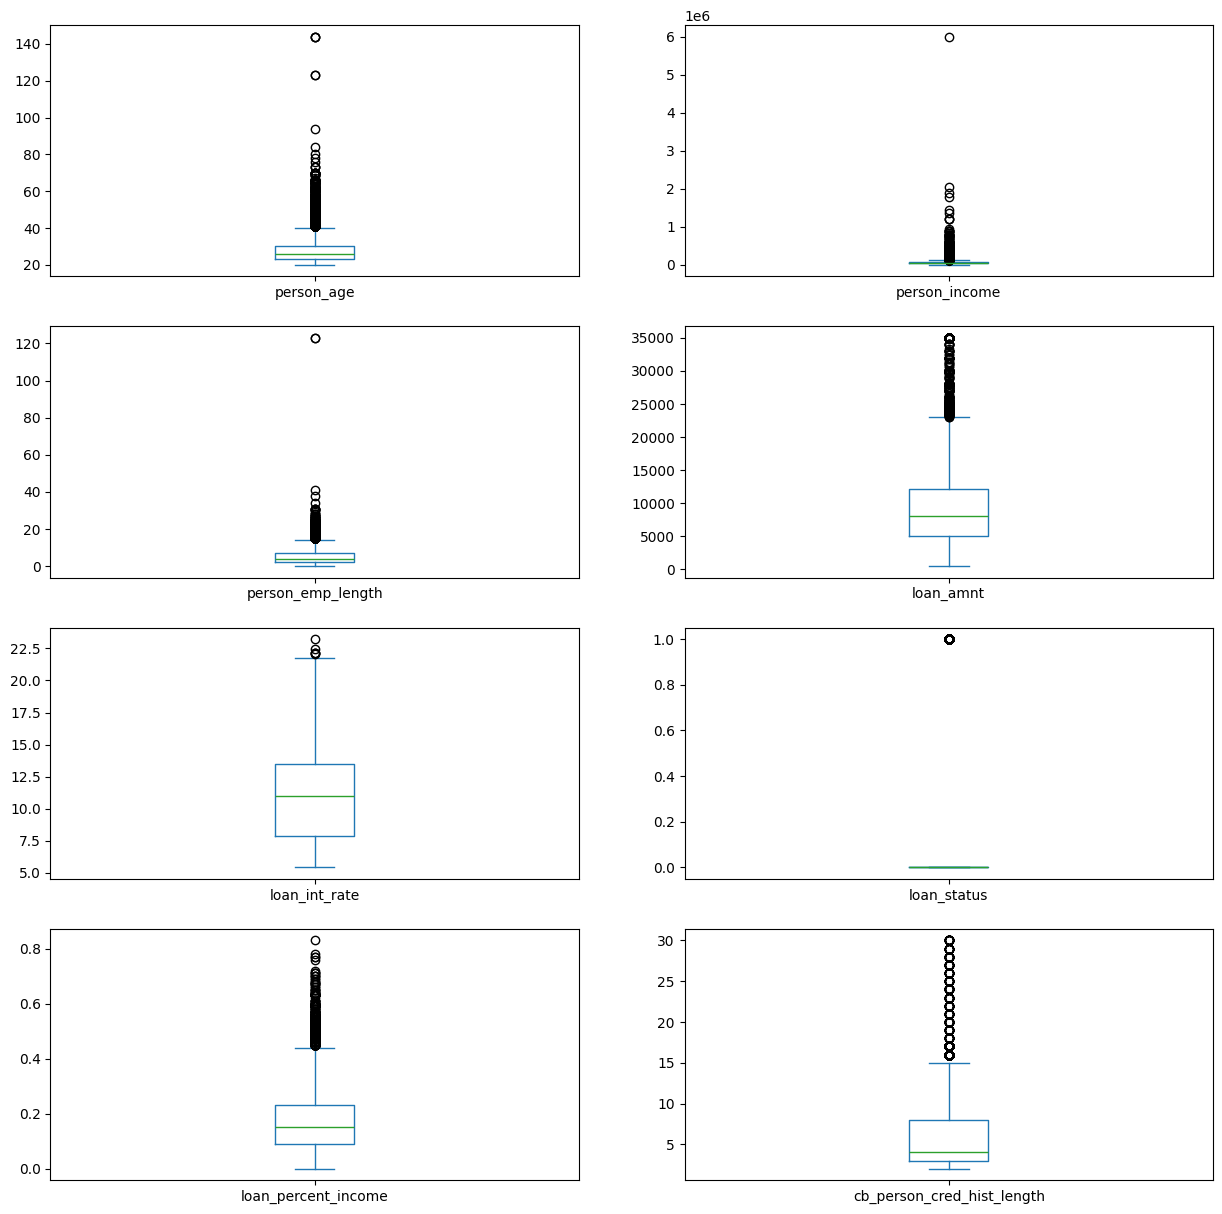

In [30]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()

fig, axes = plt.subplots(4,2, figsize=(15,15))
axes = axes.ravel()
for col, ax in zip(df[num_cols], axes):
  df[col].plot(kind='box', ax=ax)

*   Como podrás observar hay valores atípicos en todas las variables. Ejecuta el siguiente código para identificar los valores atípicos en la variable `person_age`

In [31]:
percentile_25 = df["person_age"].quantile(0.25)
percentile_75 = df["person_age"].quantile(0.75)
iqr = percentile_75 - percentile_25
upper_limit = percentile_75 + 1.5 * iqr
lower_limit = percentile_25 - 1.5 * iqr
IQR_outliers = df[(df["person_age"] < lower_limit) | (df["person_age"] > upper_limit)]
IQR_outliers

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,NaN,0,0.26,N,4
29121,50,900000,MORTGAGE,11.0,DEBTCONSOLIDATION,B,30000,12.69,0,0.03,N,15
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


# Análisis de variables de texto

 6. Obtén las siguientes estadísticas descriptivas para todas las variables de texto:
*   Tendencia central (moda)
*   Cardinalidad (cantidad de valores únicos)
*   Recuentos únicos (número de ocurrencias para cada valor único)

**NOTA**. Un resumen de estas estadísticas, puedes obtenerlas indicando en la función `describe()` que se incluirán sólo las variables de tipo object: `describe(include = 'object')`. Para los recuentos utiliza la función `df['columna'].value_counts()`

In [32]:
df.describe(include = 'object').T

,count,unique,top,freq
person_home_ownership,32581,4,RENT,16446
loan_intent,32581,6,EDUCATION,6453
loan_grade,32581,7,A,10777
cb_person_default_on_file,32581,2,N,26836


In [33]:
cat_cols = df.select_dtypes(exclude=np.number).columns.tolist()

for column in cat_cols:
    print(df[column].value_counts())
    print('-' * 30)

person_home_ownership
RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: count, dtype: int64
------------------------------
loan_intent
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: count, dtype: int64
------------------------------
loan_grade
A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: count, dtype: int64
------------------------------
cb_person_default_on_file
N    26836
Y     5745
Name: count, dtype: int64
------------------------------


7. Utiliza gráficos de barras por variable para representar la frecuencia de cada categoría.

**NOTA**. seaborn posee un gráfico de recuento, para variables de tipo object, que calcula la frecuencia de cada categoría sin necesidad de utilizar la función `value_counts()`. Para generarlo debes indicar la columna: `sns.countplot(x='columna', data=df) `

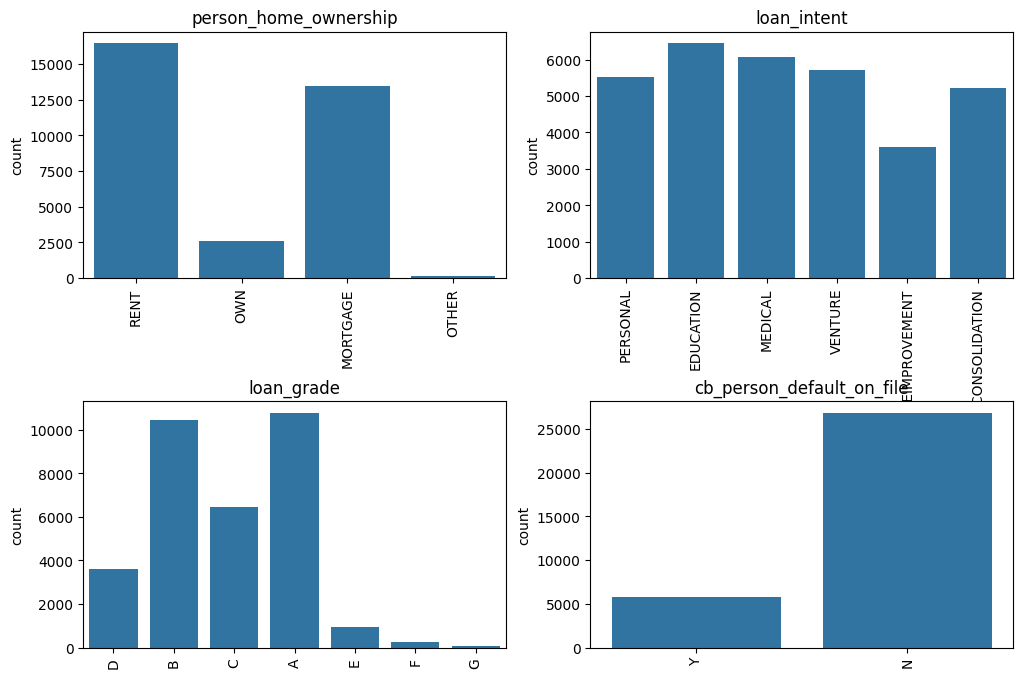

In [34]:
fig, axes = plt.subplots(2,2, figsize=(12,8))
plt.subplots_adjust(hspace=0.5)
axes = axes.ravel()
for col, ax in zip(df[cat_cols], axes):
  sns.countplot(x=df[col], ax=ax)
  ax.set(title=f'{col}', xlabel=None)
  ax.tick_params(axis='x',rotation=90)

# **Parte 2**. Análisis de correlación (bivariante y multivariante)

La variable `loan_status` será la variable de salida (o a predecir en un modelo de ML). Analiza su relación con el resto de las variables a través de los siguientes gráficos:

8. Un box plot para visualizar la distribución de `loan_percent_income` según el `loan_status`. Interpreta el resultado.

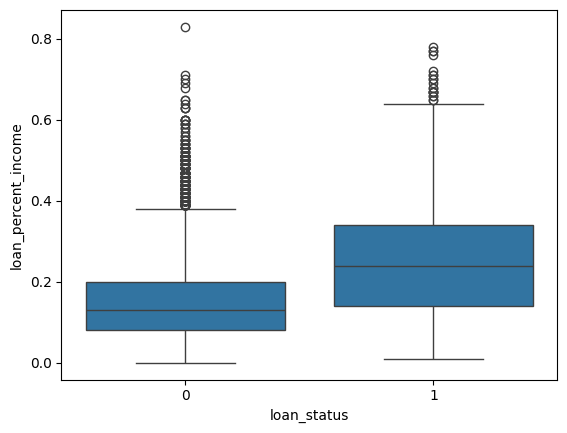

In [35]:
sns.boxplot(x='loan_status', y='loan_percent_income', data=df, legend=False)
plt.show()

En este gráfico se puede observar una clara correlación entre las variables de `loan_status` y `loan_percent_income`. Logramos ver que aquellos préstamos con un `loan_status` de 1 tienen un mayor porcentaje de `loan_percent_income`, mientras que aquellos con un menor porcentaje tienden a caer en un status de 0.

En otras palabras, se puede interpretar que aquellas personas con un porcentaje de relación deuda/ingreso alto, es decir, donde el préstamo es más grande en relación con el ingreso, tienden más a caer en un estaus de "No cumplimiento", mientras que aquellos con un porcentaje bajo suelen no presentar incumplimientos.

 9. En los gráficos de barras que obtuviste en el ejercicio 7, separa el conteo según el `load_status`, utilizando el parámetro `hue`.

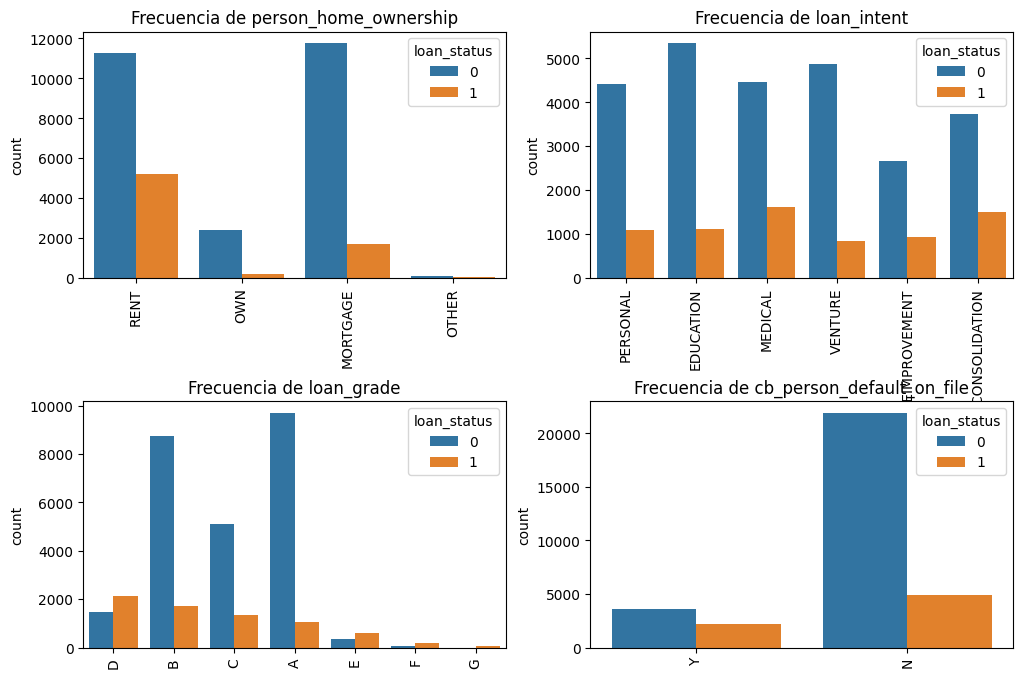

In [36]:
fig, axes = plt.subplots(2,2, figsize=(12,8))
plt.subplots_adjust(hspace=0.5)
axes = axes.ravel()
for col, ax in zip(cat_cols, axes):
  sns.countplot(x=col, data=df, ax=ax, hue='loan_status')
  ax.set(title=f'Frecuencia de {col}', xlabel=None)
  ax.tick_params(axis='x', rotation=90)

10. Un mapa de calor con los valores de correlación de todas las variables del dataframe.
*   ¿Qué variable tiene mayor correlación con `loan_status`?

<Axes: >

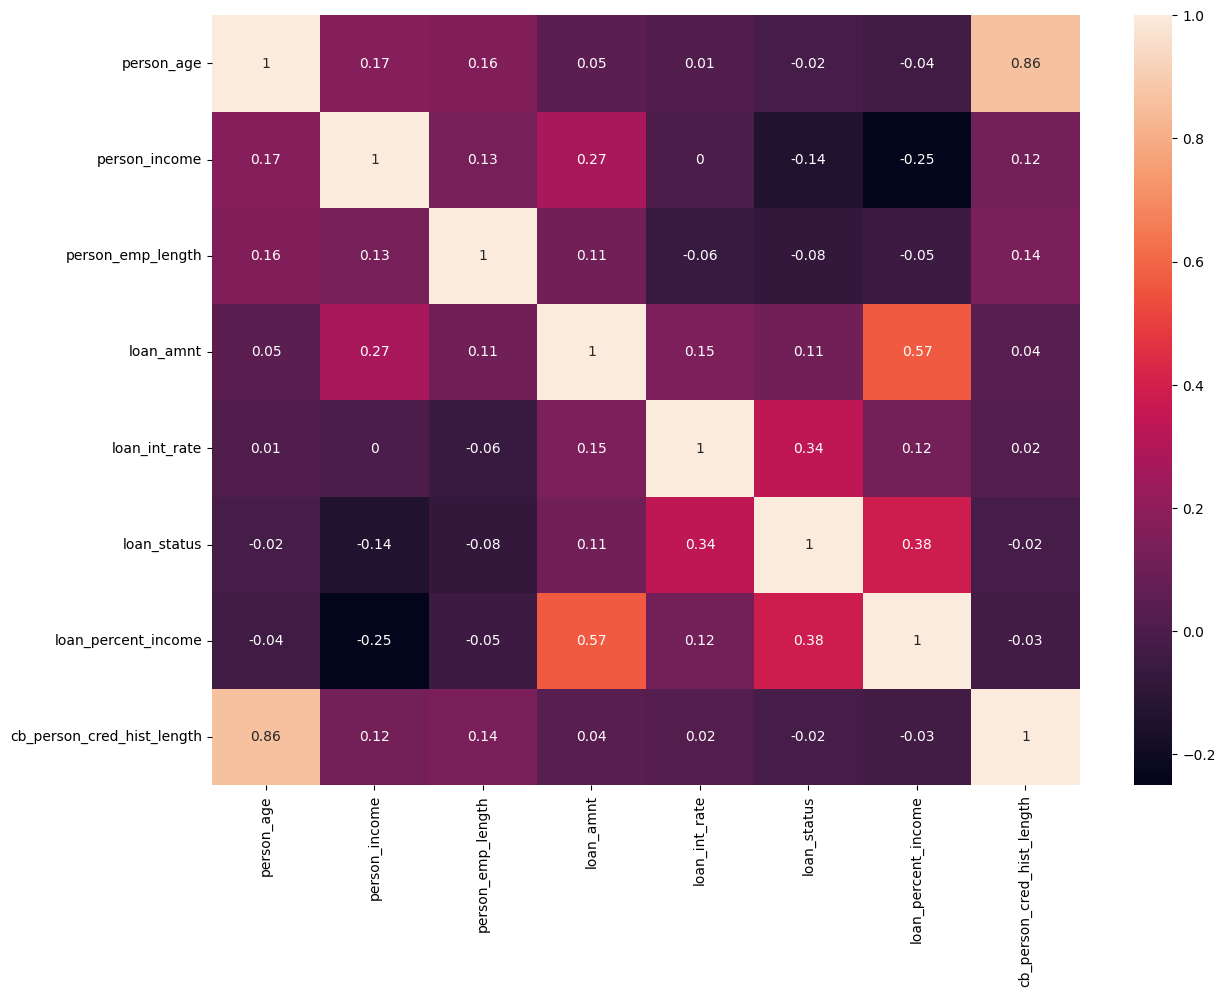

In [37]:
plt.figure(figsize = (14, 10))
sns.heatmap(round(df.corr(numeric_only=True),2), annot = True)

La variable que tiene mayor correlación con `loan_status` es la variable `loan_percent_income`, con un valor de correlación de .38.